In [12]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv("file.csv")
df.head()

,Answer_Type,Topic_Number,Variation,Difficulty_Level
0,1,30102,105,3
1,1,30102,105,3
2,1,30102,105,3
3,1,30102,105,3
4,1,30102,105,3


Text(0, 0.5, 'Difficulty_Level')

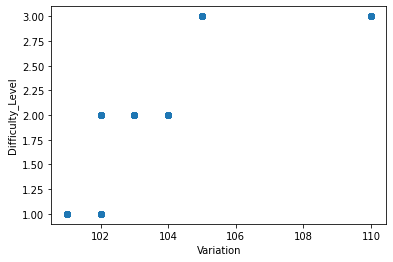

In [10]:
plt.scatter(df.Variation,df['Difficulty_Level'])
plt.xlabel('Variation')
plt.ylabel('Difficulty_Level')

In [9]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Variation','Difficulty_Level']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
km.cluster_centers_

array([[101.3902439 ,   1.18292683],
       [103.875     ,   2.25      ],
       [110.        ,   3.        ]])

In [15]:
df['cluster']=y_predicted
df.head()

,Answer_Type,Topic_Number,Variation,Difficulty_Level,cluster
0,1,30102,105,3,0
1,1,30102,105,3,0
2,1,30102,105,3,0
3,1,30102,105,3,0
4,1,30102,105,3,0


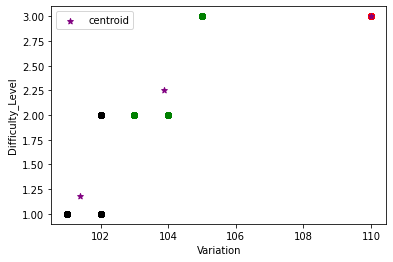

In [16]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Variation,df1['Difficulty_Level'],color='green')
plt.scatter(df2.Variation,df2['Difficulty_Level'],color='red')
plt.scatter(df3.Variation,df3['Difficulty_Level'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Variation')
plt.ylabel('Difficulty_Level')
plt.legend()

In [35]:
import mysql.connector
dodans_t=[]
time_t=[]
try:
        connection = mysql.connector.connect(host='127.0.0.2',
                                            database='coep',
                                            user='root',
                                            password='root')

        sql_select_Query = "SELECT DOD,answer,timetaken FROM studentperformance where SID=1"
        cursor = connection.cursor()
        cursor.execute(sql_select_Query)
        records = cursor.fetchall()
        print("Total number of rows in table: ", cursor.rowcount)

        #print("\nPrinting each row")
        for row in records:
            dodans_t.append([row[0],row[1]])
            time_t.append(row[2])
            # print("SID = ", row[0], )
            # print("topicnumber = ", row[1])
            # print("variation  = ", row[2])
            # print("DOD  = ", row[3])
            # print("answer  = ", row[4])
            # print("timetaken  = ", row[5], "\n")

except mysql.connector.Error as e:
    print("Error reading data from MySQL table", e)
finally:
    if connection.is_connected():
        connection.close()
        cursor.close()
        print("MySQL connection is closed")


print(dodans_t)
print(time_t)

Total number of rows in table:  10
MySQL connection is closed
[[1, 1], [1, 0], [1, 0], [1, 1], [2, 1], [2, 0], [2, 0], [3, 1], [3, 1], [3, 0]]
[55, 53, 54, 49, 55, 54, 59, 58, 52, 57]


DOD 3
Correct Percentage 66.66666666666666
Wrong Percentage 33.33333333333333 

DOD 2
Correct Percentage 33.33333333333333
Wrong Percentage 66.66666666666666 

DOD 1
Correct Percentage 50.0
Wrong Percentage 50.0 



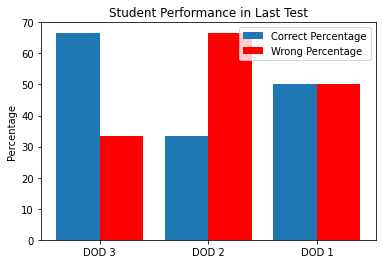

In [55]:
performance_array=[]
def performance_monitor(a):
    count_q=0
    count_ca=0
    count_wa=0
    for i in dodans_t:
        if i[0]==a:
            count_q=count_q+1
            if i[1]==0:
                count_wa=count_wa+1          
                
            elif i[1]==1:
                count_ca=count_ca+1           
                
        else:
            continue
    correct_percentage=((count_ca/count_q)*100)
    wrong_percentage=((count_wa/count_q)*100)
    performance_array.append([a,correct_percentage,wrong_percentage])
    print("DOD",a)
    print("Correct Percentage",correct_percentage)
    print("Wrong Percentage",wrong_percentage,"\n")

performance_monitor(3)
performance_monitor(2)
performance_monitor(1)

#print(performance_array)

import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['DOD 3','DOD 2','DOD 1']
Ygirls = [0,0,0]
Zboys = [0,0,0]
index=0
for j in performance_array:
    Ygirls[index] = j[1]
    index=index+1 
index=0
for k in performance_array:
    Zboys[index] = k[2]
    index=index+1 
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Correct Percentage')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Wrong Percentage',color = 'r')
  
plt.xticks(X_axis, X)
plt.ylabel("Percentage")
plt.title("Student Performance in Last Test")
plt.legend()
plt.show()